In [90]:
import numpy as np             # Used for numerical operations 
import pandas as pd            # Used for loading and manipulating datasets
import matplotlib.pyplot as plt # Used for visualizations

In [96]:
# Load dataset
df = pd.read_csv("best_books_ever.csv")

print("Shape:", df.shape)
print("Columns:", list(df.columns))

Shape: (52478, 25)
Columns: ['bookId', 'title', 'series', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg', 'bbeScore', 'bbeVotes', 'price']


In [97]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,6/21/2003,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1.00E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,7/11/1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1.00E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,1/28/2013,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/5/2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


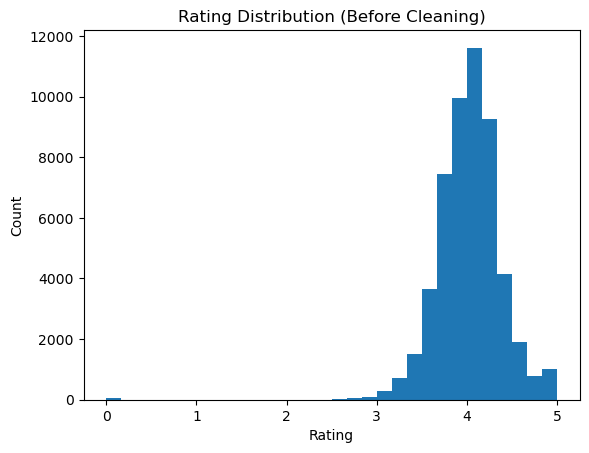

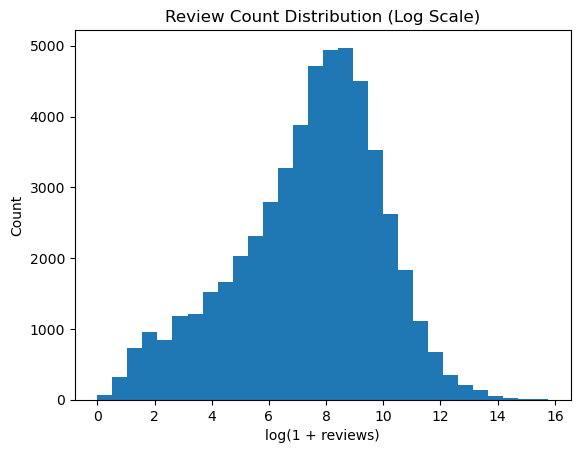

In [98]:
plt.hist(df["rating"], bins=30)
plt.title("Rating Distribution (Before Cleaning)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

plt.hist(np.log1p(df["numRatings"]), bins=30)
plt.title("Review Count Distribution (Log Scale)")
plt.xlabel("log(1 + reviews)")
plt.ylabel("Count")
plt.show()

In [107]:
# Data cleaning

# Keep only relevant columns
df = df[["title","author","genres","description","rating","numRatings","likedPercent"]].copy()

# Fill missing text fields
for c in ["title", "author", "genres", "description"]:
    df[c] = df[c].fillna("").astype(str)

# Convert numeric columns safely
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["numRatings"] = pd.to_numeric(df["numRatings"], errors="coerce")
df["likedPercent"] = pd.to_numeric(df["likedPercent"], errors="coerce")

# Drop rows where key numeric info is missing
df.dropna(subset=["rating", "numRatings"], inplace=True)

# Remove duplicate books (same title + author)
df.drop_duplicates(subset=["title", "author"], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print("After cleaning:", df.shape)
df.head(10)


After cleaning: (52390, 7)


,title,author,genres,description,rating,numRatings,likedPercent
0,The Hunger Games,Suzanne Collins,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,4.33,6376780,96.0
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)","['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",There is a door at the end of a silent corrido...,4.50,2507623,98.0
2,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...",The unforgettable novel of a childhood in a sl...,4.28,4501075,95.0
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)","['Classics', 'Fiction', 'Romance', 'Historical...",Alternate cover edition of ISBN 9780679783268S...,4.26,2998241,94.0
4,Twilight,Stephenie Meyer,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",About three things I was absolutely positive.\...,3.60,4964519,78.0
5,The Book Thief,Markus Zusak (Goodreads Author),"['Historical Fiction', 'Fiction', 'Young Adult...",Librarian's note: An alternate cover edition c...,4.37,1834276,96.0
6,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...","['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",Librarian's note: There is an Alternate Cover ...,3.95,2740713,91.0
7,The Chronicles of Narnia,"C.S. Lewis, Pauline Baynes (Illustrator)","['Fantasy', 'Classics', 'Fiction', 'Young Adul...","Journeys to the end of the world, fantastic cr...",4.26,517740,96.0
8,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","This four-volume, boxed set contains J.R.R. To...",4.60,110146,98.0
9,Gone with the Wind,Margaret Mitchell,"['Classics', 'Historical Fiction', 'Fiction', ...","Scarlett O'Hara, the beautiful, spoiled daught...",4.30,1074620,94.0


In [136]:
# Creating proxy label 

df["recommended"] = ((df["likedPercent"] >= 90)).astype(int)
df["recommended"].value_counts()

recommended
1    40085
0    12305
Name: count, dtype: int64

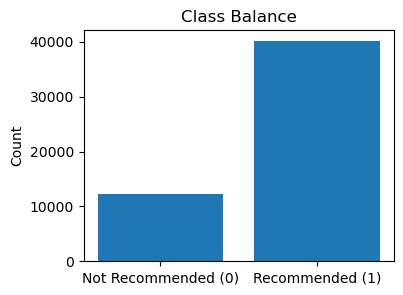

In [137]:
#Exploratory Data Analysis (EDA)
counts = df["recommended"].value_counts()

plt.figure(figsize=(4,3))
plt.bar(["Not Recommended (0)", "Recommended (1)"],
        [counts.get(0,0), counts.get(1,0)])
plt.title("Class Balance")
plt.ylabel("Count")
plt.show()

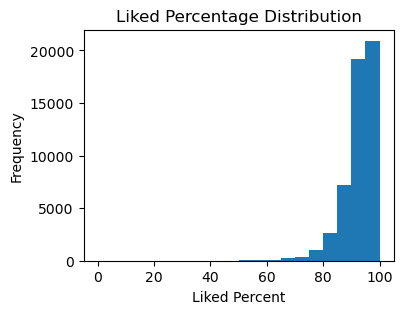

In [138]:
plt.figure(figsize=(4,3))
plt.hist(df["likedPercent"].dropna(), bins=20)
plt.title("Liked Percentage Distribution")
plt.xlabel("Liked Percent")
plt.ylabel("Frequency")
plt.show()

In [141]:
# Numerical features

df["log_reviews"] = np.log1p(df["numRatings"])
df["log_reviews"]
# Number of ratings are highly skewed.
# We apply a log transformation to reduce skewness.

0        15.668174
1        14.734846
2        15.319827
3        14.913537
4        15.417827
           ...    
52385     6.770789
52386     3.637586
52387     8.806124
52388     5.476464
52389     5.509388
Name: log_reviews, Length: 52390, dtype: float64

In [143]:
# Tect feature
# All text-related information is combined into one column so that models can learn from full content.
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text"] = (
    df["title"].apply(clean_text) + " " +
    df["author"].apply(clean_text) + " " +
    df["genres"].apply(clean_text) + " " +
    df["description"].apply(clean_text)
)
df["text"].head()

0    the hunger games suzanne collins ['young adult...
1    harry potter and the order of the phoenix j.k....
2    to kill a mockingbird harper lee ['classics', ...
3    pride and prejudice jane austen, anna quindlen...
4    twilight stephenie meyer ['young adult', 'fant...
Name: text, dtype: object

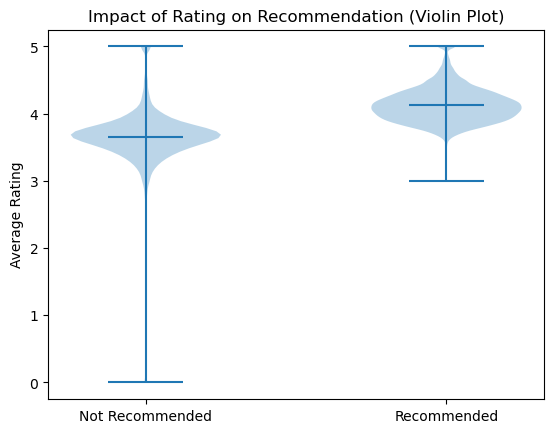

In [82]:
# VISUALIZATION 1: EFFECT OF AVERAGE RATING ON RECOMMENDATION

# A violin plot shows both the distribution and density
# of ratings for recommended vs non-recommended books.
# This helps us see not just the average but the spread.

plt.figure()
plt.violinplot(
    [df[df["recommended"] == 0][col_rating],
     df[df["recommended"] == 1][col_rating]],
    showmeans=True
)
plt.xticks([1, 2], ["Not Recommended", "Recommended"])
plt.ylabel("Average Rating")
plt.title("Impact of Rating on Recommendation (Violin Plot)")
plt.show()

<Figure size 640x480 with 0 Axes>

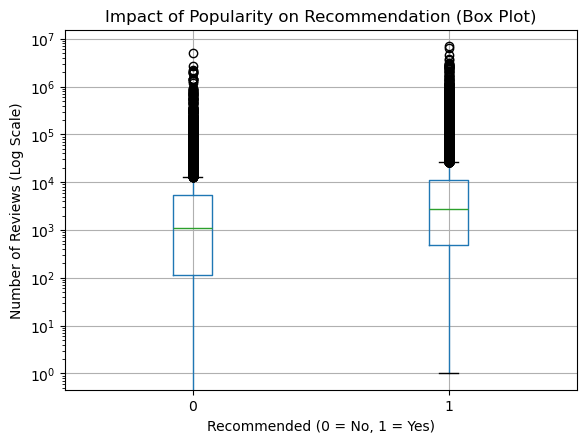

In [146]:
# VISUALIZATION 2: EFFECT OF NUMBER OF REVIEWS ON RECOMMENDATION

# A box plot highlights the median and outliers.
# Log scale is used because review counts are highly skewed.

plt.figure()
df.boxplot(column="numRatings", by="recommended")
plt.yscale("log")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Number of Reviews (Log Scale)")
plt.title("Impact of Popularity on Recommendation (Box Plot)")
plt.suptitle("")
plt.show()

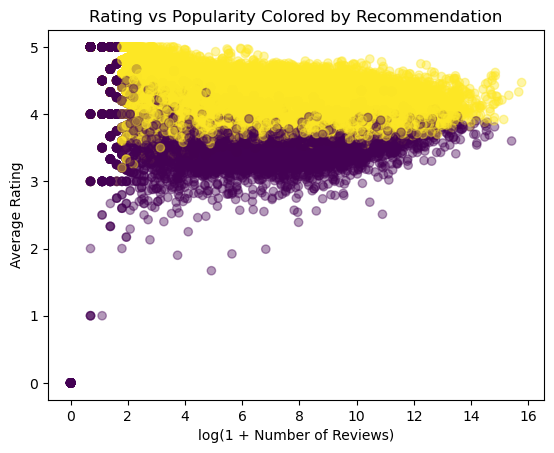

In [147]:
# VISUALIZATION 3: RATING VS POPULARITY

# Scatter plot shows the relationship between rating
# and popularity, colored by recommendation status.

plt.figure()
plt.scatter(
    df["log_reviews"],
    df["rating"],
    c=df["recommended"],
    alpha=0.4
)
plt.xlabel("log(1 + Number of Reviews)")
plt.ylabel("Average Rating")
plt.title("Rating vs Popularity Colored by Recommendation")
plt.show()

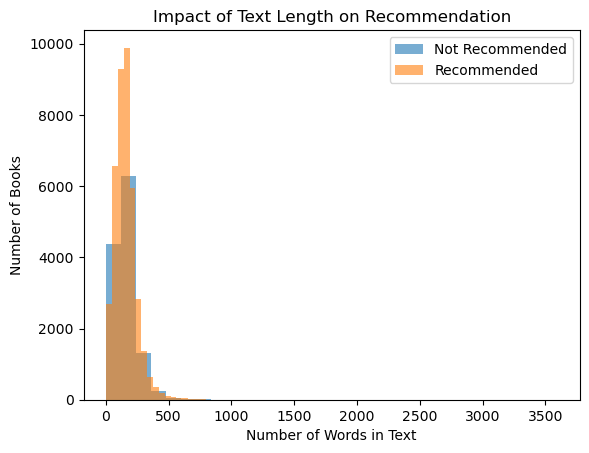

In [149]:
# VISUALIZATION 4: TEXT LENGTH IMPACT
# Overlaid histograms compare description length
# for recommended vs non-recommended books.

df["text_length"] = df["text"].apply(lambda x: len(x.split()))
plt.figure()
plt.hist(df[df["recommended"] == 0]["text_length"],bins=30,alpha=0.6,label="Not Recommended")
plt.hist(df[df["recommended"] == 1]["text_length"],bins=30,alpha=0.6,label="Recommended")
plt.xlabel("Number of Words in Text")
plt.ylabel("Number of Books")
plt.title("Impact of Text Length on Recommendation")
plt.legend()
plt.show()

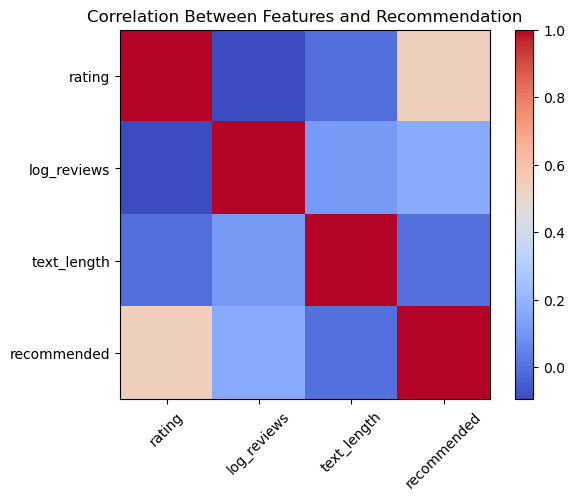

In [150]:
# VISUALIZATION 5: CORRELATION HEATMAP
# Heatmap shows correlation between numeric features
# and the recommendation outcome.

corr_data = df[["rating", "log_reviews", "text_length", "recommended"]].corr()

plt.figure()
plt.imshow(corr_data, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=45)
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.title("Correlation Between Features and Recommendation")
plt.show()

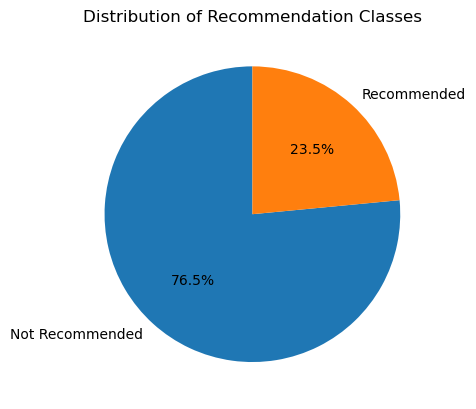

In [151]:
# VISUALIZATION 6: CLASS DISTRIBUTION
# Pie chart shows the balance between recommended
# and non-recommended books.

class_counts = df["recommended"].value_counts()
plt.figure()
plt.pie(
    class_counts,
    labels=["Not Recommended", "Recommended"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Recommendation Classes")
plt.show()

In [152]:
# SAVE PROCESSED DATASET
df.to_csv("processed_books.csv", index=False)
print("Processed dataset saved successfully.")

Processed dataset saved successfully.
